<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/14_demo_of_long_distance_problem_gru_model_for_distance_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEMO LONG DISTANCE PROBLEM - GRU MODEL**

Long Distance Applied

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 20
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 20)
(5000,)


In [4]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = GRU(5)(i)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 400, validation_split = 0.5)

(5000, 20)
(5000, 20, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 gru (GRU)                   (None, 5)                 120       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
79/79 [==============================] - 5s 23ms/step - loss: 0.6957 - accuracy: 0.5068 - val_loss: 0.6959 - val_accuracy: 0.4928
Epoch 2/400
79/79 [==============================] - 2s 22ms/step - loss: 0.6949 - accuracy: 0.4988 - val_loss: 0.6933 - val_accuracy: 0.5108
Epoch 3/400
79/79 

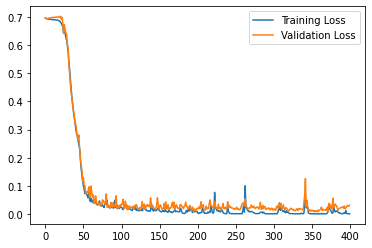

In [5]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

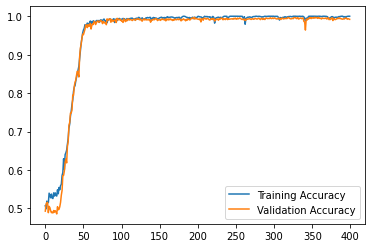

In [6]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

For Sequence Length T = 20,
+ The GRU Model generalizes well.

***

INCREASING THE SEQUENCE LENGTH T = 30.


In [7]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 30
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 30)
(5000,)


In [8]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = GRU(5)(i)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 400, validation_split = 0.5)

(5000, 30)
(5000, 30, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 gru_1 (GRU)                 (None, 5)                 120       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
79/79 [==============================] - 6s 37ms/step - loss: 0.6951 - accuracy: 0.5020 - val_loss: 0.6939 - val_accuracy: 0.4956
Epoch 2/400
79/79 [==============================] - 2s 21ms/step - loss: 0.6943 - accuracy: 0.5040 - val_loss: 0.6940 - val_accuracy: 0.5052
Epoch 3/400
79/7

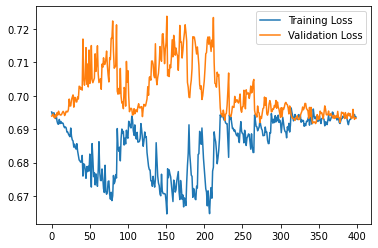

In [9]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

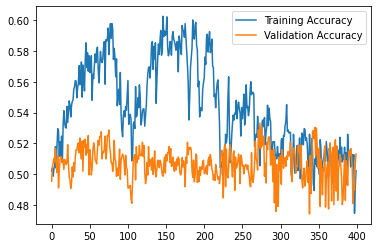

In [10]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

GRU is not able to generalizes very well on T = 30.

***

For T = 30, applying the return_sequences = True and adding MaxPooling1D layer.

In [11]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 30
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 30)
(5000,)


In [13]:
## define the inputs
print(X.shape)
## expand the input size to RNN dimension.
inputs = np.expand_dims(X, -1)
print(inputs.shape)

## define the model
i = Input(shape = (T, D))
x = GRU(5, return_sequences = True)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = "sigmoid")(x)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(inputs, Y, epochs = 400, validation_split = 0.5)

(5000, 30)
(5000, 30, 1)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 gru_3 (GRU)                 (None, 30, 5)             120       
                                                                 
 global_max_pooling1d (Globa  (None, 5)                0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
79/79 [==============================] - 7s 33ms/step - loss: 0.6989 - accuracy: 0.4852 - 

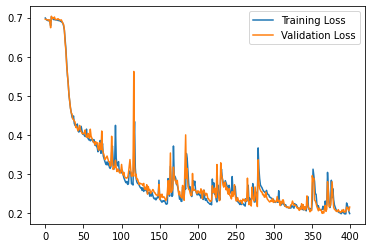

In [14]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

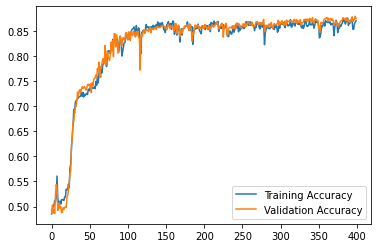

In [15]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

Here with using the MaxPooling layer, GRU is able to generalizes to an Extend.

***